***Intelligent System Group 19 Term Project***<br>
## Patient's condition prediction using NLP
**Shubham Shah**<br>
**Dhvani Patel**<br>
**Harsh Raval**<br>
**Anurag Tyagi**<br>
**Keerthy Nallabantu**

## Task 
### Project Goal
The goal of this project is to analyze the drug reviews using Natural Language Processing. The project will be evaluated using both the accuracy of correct prediction and confusion matrix. There will be predictions for disease like Anxity, Birth Control, Depression, Diabetes, Type 2, etc. The study will be completed in few steps as mentioned below. The first of which we will use the drug review data from drugs.com. This will give an explanation as to how words are extracted can be used to predict the medical condition of a patient. Our group plans to use several types of analyses to help predict the medical condition based on reviews using Bag of words and TFIDF tokenizers and Naive Bayes and Passive Aggressive Classifier. 

### Research Questions:
- Which words/features are more important to a particular medical condition?
- How different tokenization method affect the reviews dataset and accuracy?
- Which model is more efficient for this particular dataset?
- Which is more accurate stemming vs lemmitization?


**This notebook will contain below action items**
- Tokenize the reviews.
- Clean them by removing puntuation, special characters, numbers.
- Convert them to lower case for better accuracy.
- Lemmitization in place of stemming.
- Two different methods to verctorize: Bag of words & TFIDF.
- Apply two most accurate for text dataset machine learning algorithms: Naive Bayes & Passive Agressive Classifier.
- Compare both models and choose the most accurate one. 

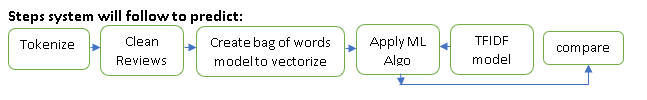

## Dataset 

Source Reference: https://archive.ics.uci.edu/ml/datasets/Drug+Review+Dataset+%28Drugs.com%29
- The dataset represent the reviews of the drugs extracted from the site Drugs.com
- There are total six features in the given dataset, which includes 215063 number of records.

In [75]:
import pandas as pd
import itertools
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline


pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)


reviews = pd.read_csv('./data/drugsComTrain_raw.tsv', sep='\t').append(pd.read_csv('./data/drugsComTest_raw.tsv', sep='\t'))

In [76]:
reviews.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1                "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."   
3                                                                                                                                                                                                                                                                                                                       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is

In [77]:
reviews.shape

(215063, 7)

- Unnamed:0 Extra column, can be removed as not needed.
- drugName: Name of the drug used by patient, for which review is written. (Can be Categorical)
- condition: Traget variable or patient's actual condition. (Categorical)
- review: The reviews from patients. (Nominal)
- rating: out of 20 (Numeric/Categorical)
- date: Review date.
- usefulCount: Number of visitors found that particular review as useful.

In [78]:
# removing unnecessary column
reviews = reviews.drop(columns=["Unnamed: 0"])

## Exploratory Data Analysis, Data Preprocessing and Data Cleaning

In [79]:
reviews.head()

drugName                     condition  \
0                 Valsartan  Left Ventricular Dysfunction   
1                Guanfacine                          ADHD   
2                    Lybrel                 Birth Control   
3                Ortho Evra                 Birth Control   
4  Buprenorphine / naloxone             Opiate Dependence   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        "It has no side effect, I take it in combination of Bystolic 5 Mg and Fish Oil"   
1                "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."   
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."   
3                                                                                                                                                                                                                                                                                                                       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3

In [80]:
# some statastics
reviews.describe()

rating  usefulCount
count 215063.000   215063.000
mean       6.990       28.001
std        3.276       36.346
min        1.000        0.000
25%        5.000        6.000
50%        8.000       16.000
75%       10.000       36.000
max       10.000     1291.000

In [81]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   drugName     215063 non-null  object 
 1   condition    213869 non-null  object 
 2   review       215063 non-null  object 
 3   rating       215063 non-null  float64
 4   date         215063 non-null  object 
 5   usefulCount  215063 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 11.5+ MB


**Note: As there are no missing values, we do not need to deal with that.**

In [82]:
reviews['rating'].value_counts()

10.000    68005
9.000     36708
1.000     28918
8.000     25046
7.000     12547
5.000     10723
2.000      9265
3.000      8718
6.000      8462
4.000      6671
Name: rating, dtype: int64

In [83]:
reviews['drugName'].value_counts().head(10)

Levonorgestrel                        4930
Etonogestrel                          4421
Ethinyl estradiol / norethindrone     3753
Nexplanon                             2892
Ethinyl estradiol / norgestimate      2790
Ethinyl estradiol / levonorgestrel    2503
Phentermine                           2085
Sertraline                            1868
Escitalopram                          1747
Mirena                                1673
Name: drugName, dtype: int64

In [84]:
reviews['condition'].value_counts().head(10)

Birth Control      38436
Depression         12164
Pain                8245
Anxiety             7812
Acne                7435
Bipolar Disorde     5604
Insomnia            4904
Weight Loss         4857
Obesity             4757
ADHD                4509
Name: condition, dtype: int64

**As there are many classifications but the one which have more reviews we will consider. So we will consider only below conditions to be predicted.**

In [85]:
pred_conditions = ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia','Weight Loss', 'Obesity', 'ADHD', 'Diabetes, Type 2']

- Reducing the data by limiting the conditions as there are less data for other conditions and due to which model can be skewed.

In [86]:
reviews = reviews[reviews['condition'].isin(pred_conditions)]

In [87]:
reviews.condition.value_counts()

Birth Control       38436
Depression          12164
Pain                 8245
Anxiety              7812
Acne                 7435
Bipolar Disorde      5604
Insomnia             4904
Weight Loss          4857
Obesity              4757
ADHD                 4509
Diabetes, Type 2     3362
Name: condition, dtype: int64

In [88]:
reviews.shape

(102085, 6)

**As we are using NLP to predict, we will be only considering the reviews and condition columns required to predict.**

In [89]:
unnecessary_columns = ['drugName','rating','date','usefulCount']

In [90]:
df = reviews.drop(columns=unnecessary_columns)

In [91]:
df.head()

condition  \
1             ADHD   
2    Birth Control   
3    Birth Control   
7  Bipolar Disorde   
9    Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  review  
1                "My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective."  
2  "I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."  
3                                                                                                                                                                                                                                                                                                                       "This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch"  
7                          "Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot."  
9                      "I had been on the pill for many years

**As these reviews are extracted from a website, there can be many unnecessary characters, web tags, spaces, letters, special characters, which we need to remove to make the dataset clean.**

For example, given data is containing unrequired quotes.

In [92]:
df['review'][2]

'"I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas."'

**Removing unnecessary quotes from all the columns.**

In [93]:
for column in df.columns.to_list():
    df[column] = df[column].apply(lambda x: x.replace('"', ''))

In [94]:
df['review'][2]

'I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.'

**Removing stop words as they do not add any meaning to the reviews**<br>
**Stopwords: most frequent word in any language.**

In [95]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{'over', 'up', 'are', 'won', 'mightn', 'again', 'ourselves', 'a', 'on', 'him', 'themselves', 'the', 'll', "mightn't", 'as', 'only', 'when', 'y', "mustn't", 'myself', 'itself', 'each', "it's", 'very', 'who', 'before', 'down', 'wasn', "hasn't", 'after', 'below', "you've", 'more', 'you', 'not', 'where', 'me', 'shan', 'hadn', 'these', 'hasn', "weren't", 'did', "that'll", 'i', 'by', 'weren', 'our', 'can', 'and', 'my', 'under', 'now', 'yours', 'was', 'herself', 'for', 'yourself', 'this', 'whom', "won't", 'o', 'few', "shan't", 'once', 'or', 'do', 'an', 'such', 'his', 'its', "couldn't", 'other', 'they', "needn't", 'himself', "wouldn't", 'but', 'been', 'until', 'will', 'isn', 'doing', 'theirs', 's', 'off', 'it', 'needn', 'her', 'being', 'of', 'most', 'all', 'any', "wasn't", 'here', 'those', 'nor', 'm', 'shouldn', 'am', 'between', 'should', 'aren', 'your', 'that', 're', 'were', "isn't", 'some', 'both', 'mustn', 'with', 'ours', 'there', 'doesn', 'what', 'be', "you'll", 'above', 'd', 'about', "had

**As given in below article, Lemmatization is more accurate as there is a meaning and in stemming sometimes there won't be any meaning hence we will be using Lemmatization in place of stemming.**

https://blog.bitext.com/what-is-the-difference-between-stemming-and-lemmatization/ <br>
https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html

In [96]:
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

stem = PorterStemmer()

lem = WordNetLemmatizer()


In [97]:
print(stem.stem('party'))
print(stem.stem('vocabulary'))

parti
vocabulari


In [98]:
# nltk.download('wordnet')
print(lem.lemmatize('party'))
print(lem.lemmatize('vocabulary'))

party
vocabulary


**To remove html tags from review, we can use BeautifulSoup module.**

In [99]:
from bs4 import BeautifulSoup as bs
def removeHtmlTags(review):
    return bs(review, 'html.parser').get_text()

In [100]:
df['review_cleaned'] = df['review'].apply(removeHtmlTags)

In [101]:
df.head()

condition  \
1             ADHD   
2    Birth Control   
3    Birth Control   
7  Bipolar Disorde   
9    Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
1                My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.   
2  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.   
3                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch   
7                          Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.   
9                      I had been on the pill for many years. When

**There won't be any meaning for the single letters in the review so we can remove them.**

In [102]:
import re
df['review_cleaned'] = df['review_cleaned'].apply(lambda x: re.sub('[^a-zA-Z]', " ", x))

In [103]:
df.head()

condition  \
1             ADHD   
2    Birth Control   
3    Birth Control   
7  Bipolar Disorde   
9    Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
1                My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.   
2  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.   
3                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch   
7                          Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.   
9                      I had been on the pill for many years. When

**Removing the stopwords from reviews and making it lemmatized words to that only meaningful words should be present in the reviews.**

In [104]:
def removeStop(x):
    ws = x.lower().split()
    removed_stop = [w for w in ws if w not in stops]
    lem_words = [lem.lemmatize(wrd) for wrd in removed_stop]
    return " ".join(lem_words)

In [105]:
df['review_cleaned'] = df['review_cleaned'].apply(removeStop)

In [106]:
df.head()

condition  \
1             ADHD   
2    Birth Control   
3    Birth Control   
7  Bipolar Disorde   
9    Birth Control   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                review  \
1                My son is halfway through his fourth week of Intuniv. We became concerned when he began this last week, when he started taking the highest dose he will be on. For two days, he could hardly get out of bed, was very cranky, and slept for nearly 8 hours on a drive home from school vacation (very unusual for him.) I called his doctor on Monday morning and she said to stick it out a few days. See how he did at school, and with getting up in the morning. The last two days have been problem free. He is MUCH more agreeable than ever. He is less emotional (a good thing), less cranky. He is remembering all the things he should. Overall his behavior is better. \r\nWe have tried many different medications and so far this is the most effective.   
2  I used to take another oral contraceptive, which had 21 pill cycle, and was very happy- very light periods, max 5 days, no other side effects. But it contained hormone gestodene, which is not available in US, so I switched to Lybrel, because the ingredients are similar. When my other pills ended, I started Lybrel immediately, on my first day of period, as the instructions said. And the period lasted for two weeks. When taking the second pack- same two weeks. And now, with third pack things got even worse- my third period lasted for two weeks and now it&#039;s the end of the third week- I still have daily brown discharge.\r\nThe positive side is that I didn&#039;t have any other side effects. The idea of being period free was so tempting... Alas.   
3                                                                                                                                                                                                                                                                                                                       This is my first time using any form of birth control. I&#039;m glad I went with the patch, I have been on it for 8 months. At first It decreased my libido but that subsided. The only downside is that it made my periods longer (5-6 days to be exact) I used to only have periods for 3-4 days max also made my cramps intense for the first two days of my period, I never had cramps before using birth control. Other than that in happy with the patch   
7                          Abilify changed my life. There is hope. I was on Zoloft and Clonidine when I first started Abilify at the age of 15.. Zoloft for depression and Clondine to manage my complete rage. My moods were out of control. I was depressed and hopeless one second and then mean, irrational, and full of rage the next. My Dr. prescribed me 2mg of Abilify and from that point on I feel like I have been cured though I know I&#039;m not.. Bi-polar disorder is a constant battle. I know Abilify works for me because I have tried to get off it and lost complete control over my emotions. Went back on it and I was golden again.  I am on 5mg 2x daily. I am now 21 and better than I have ever been in the past. Only side effect is I like to eat a lot.   
9                      I had been on the pill for many years. When

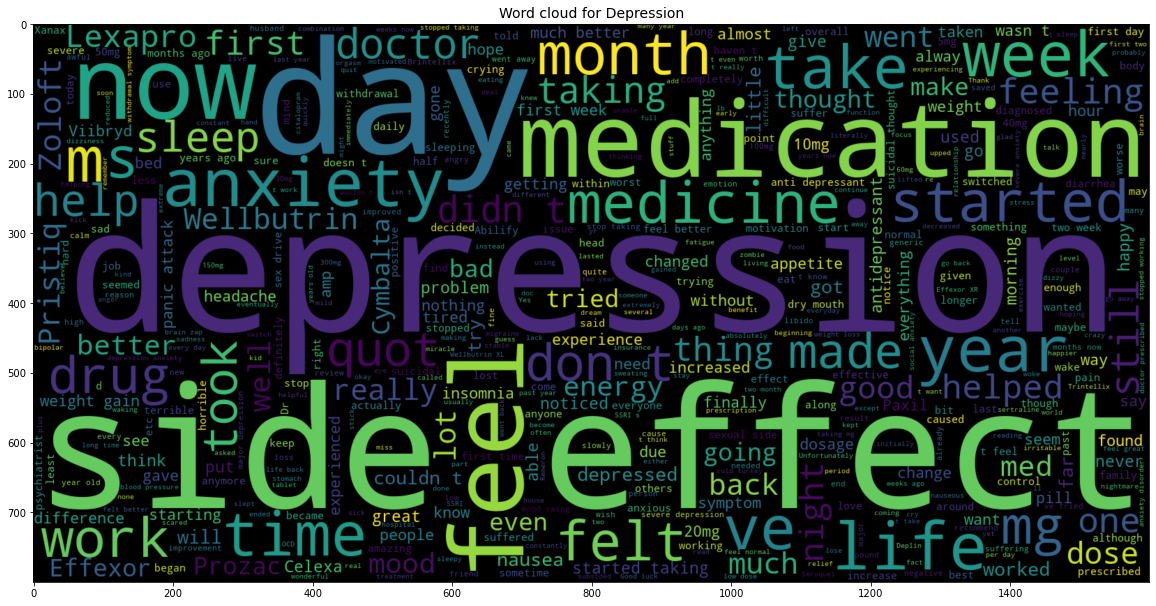

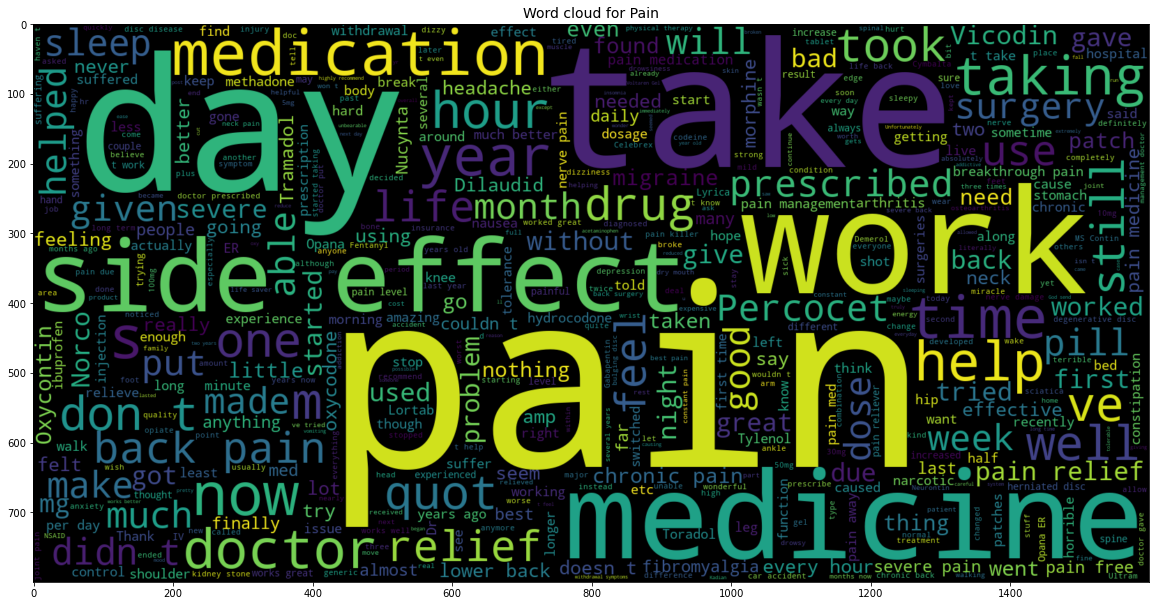

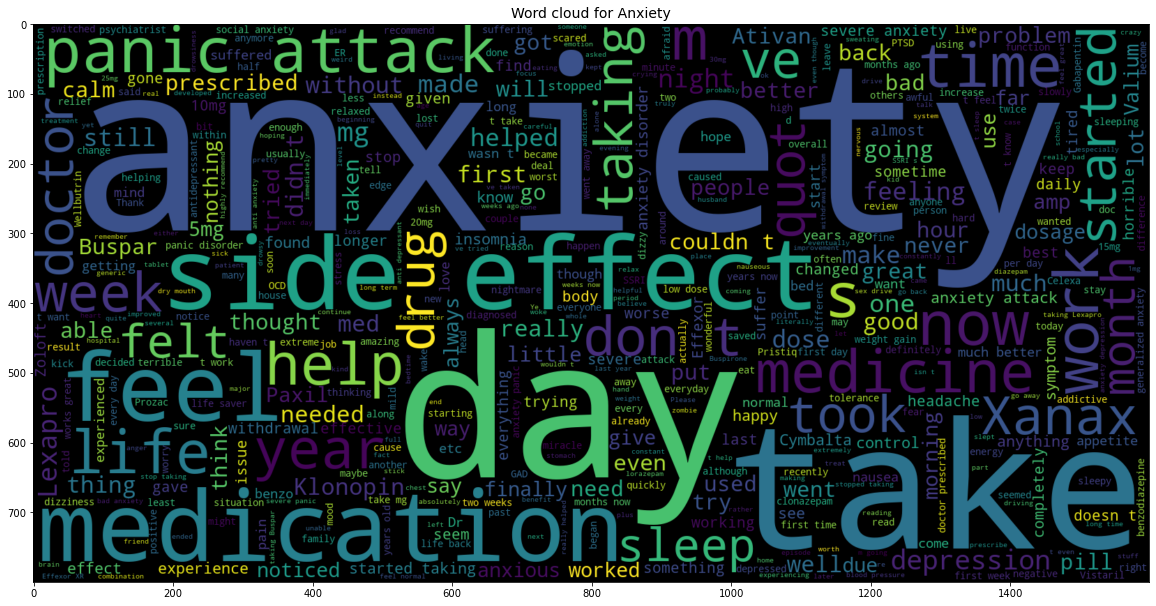

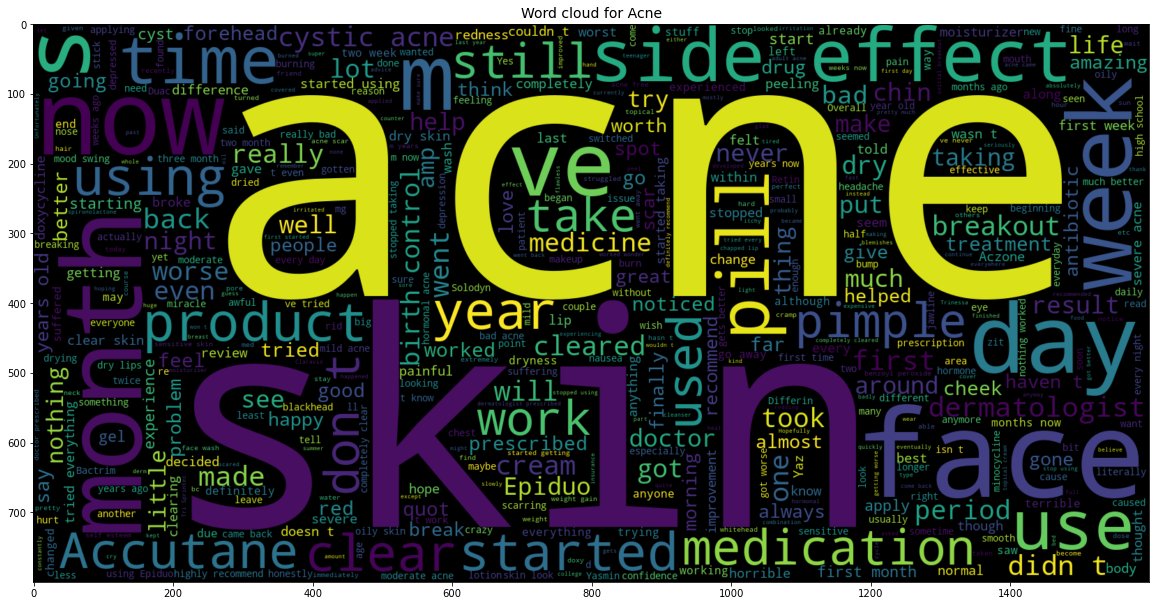

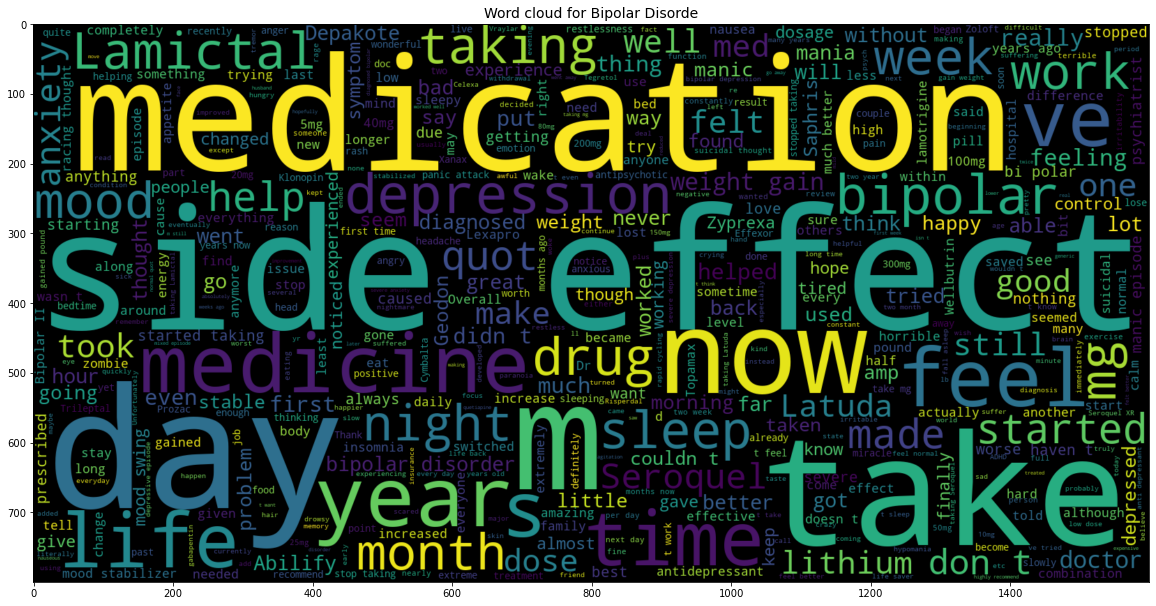

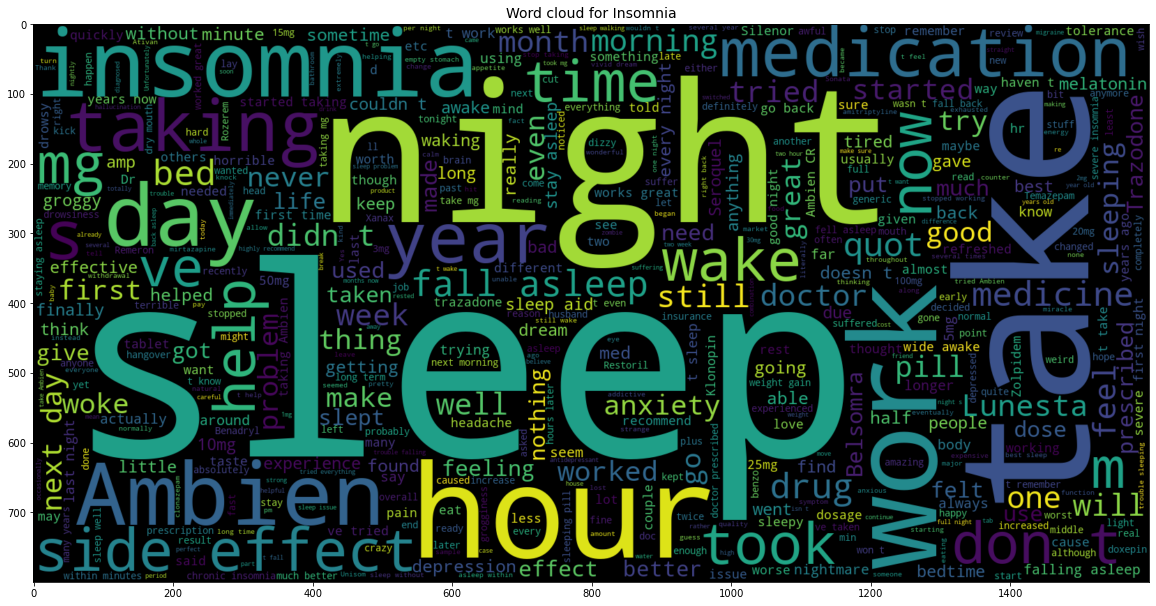

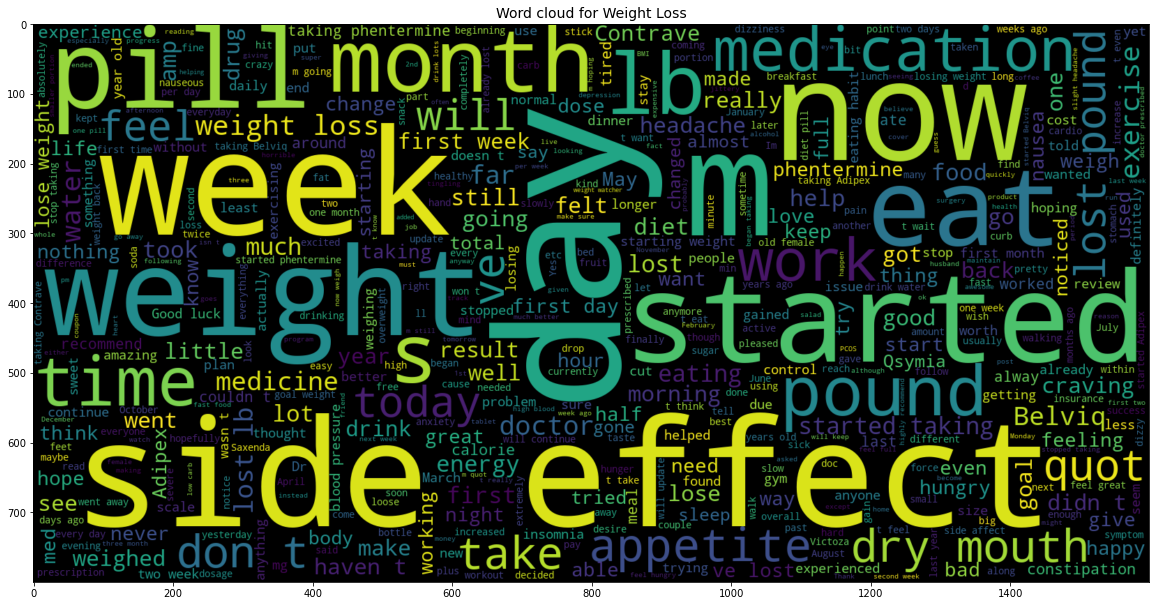

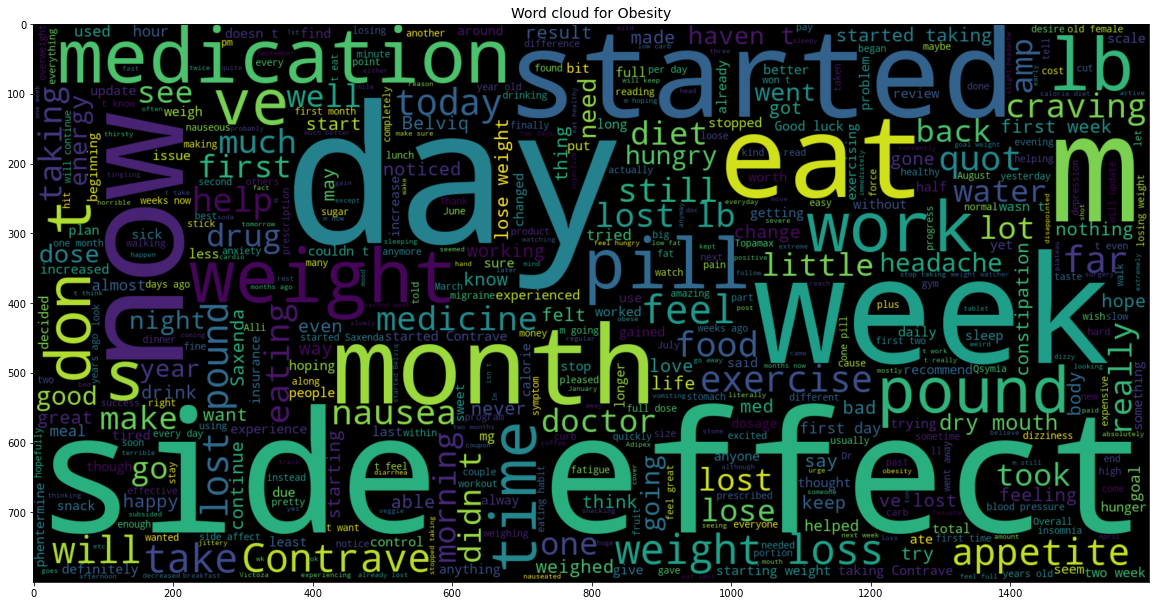

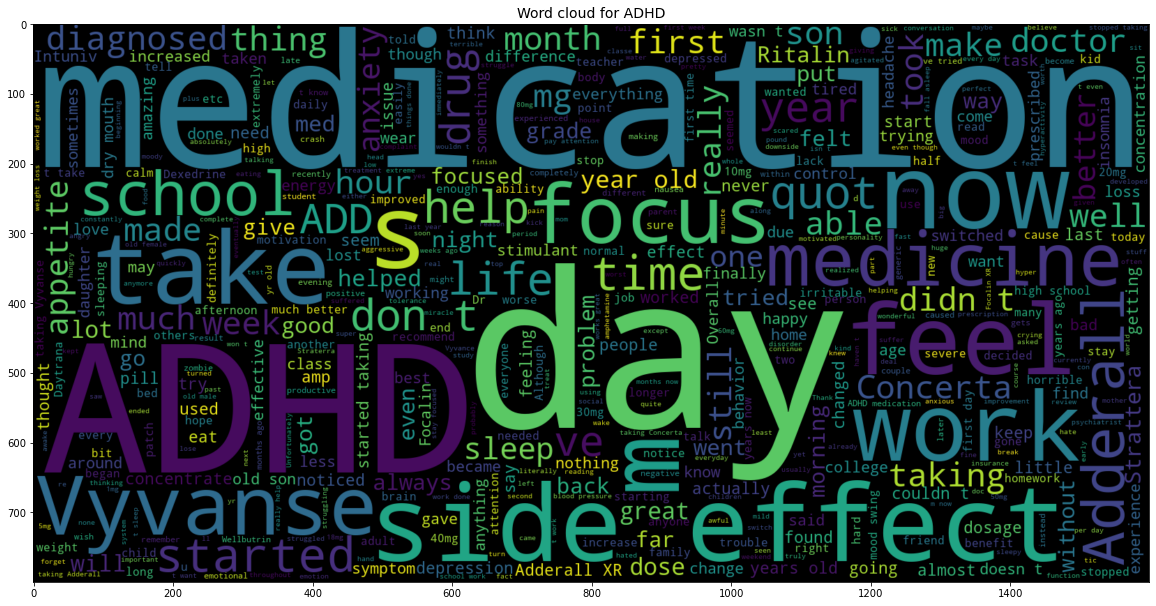

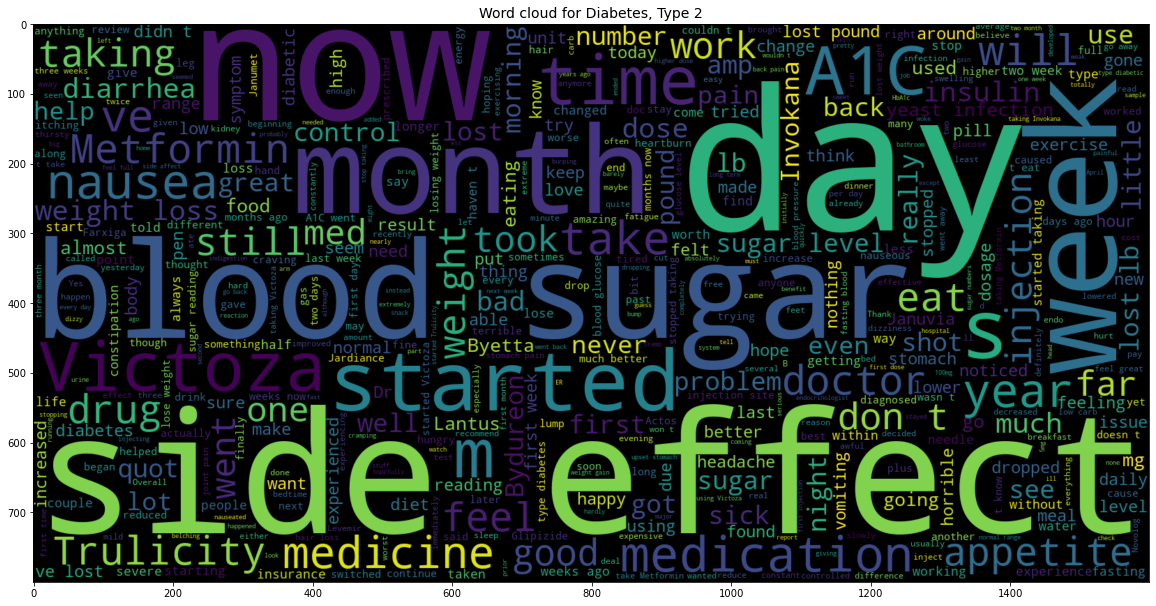

In [107]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for cls in pred_conditions:
    plt.figure(figsize = (20,20))
    wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(df[df['condition']==cls].review))
    plt.imshow(wc , interpolation = 'bilinear')
    plt.title('Word cloud for '+cls,fontsize=14)

**Dividing dataset into two parts one for test one for train.**

In [137]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(df['review_cleaned'], df['condition'], stratify=df['condition'], test_size=0.20, random_state=50)

In [138]:
def imp_words(vectorize, classifier, cls, n=5):
    index = list(classifier.classes_).index(cls)
    words = vectorize.get_feature_names()
    for c, f in sorted(zip(classifier.coef_[index], words))[-n:]:
        print (cls, f, c)

In [139]:
def print_confusion(cm, s=""):
    cm_df = pd.DataFrame(cm,index = pred_conditions, columns = pred_conditions)
    plt.figure(figsize=(10,8))
    sns.heatmap(cm_df, annot=True, fmt='g')
    plt.title(s+' Confusion Matrix')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()

## Bag of Words Tokenizer

In [140]:
bag_vectorizer = CountVectorizer(stop_words='english')
bag_train = bag_vectorizer.fit_transform(Xtrain)
bag_test = bag_vectorizer.transform(Xtest)

In [141]:
bag_train

<81668x25324 sparse matrix of type '<class 'numpy.int64'>'
	with 2537120 stored elements in Compressed Sparse Row format>

## Applying Machine Learning Models

### Naive Bayes 

In [142]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [143]:
model = MultinomialNB()
model.fit(bag_train, ytrain)
pred = model.predict(bag_test)
score = metrics.accuracy_score(ytest, pred)
print("Accuracy :", score)

Accuracy : 0.861732869667434


In [144]:
cm = metrics.confusion_matrix(ytest, pred, labels=pred_conditions)

#### Important words for this model 

In [145]:
print("--------------------Bag of words + Naive Bayes------------------------------")
for cls in pred_conditions:
    imp_words(bag_vectorizer, model, cls)
    print("###########################################################")
    

--------------------Bag of words + Naive Bayes------------------------------
Birth Control year -4.34410000820748
Birth Control day -4.2356169694730355
Birth Control pill -4.0375317830009845
Birth Control month -3.719241000043853
Birth Control period -3.6854755447246035
###########################################################
Depression feel -4.352549491285467
Depression effect -4.310644767023641
Depression day -4.19913744030127
Depression depression -4.113693763107683
Depression mg -4.016195398622806
###########################################################
Pain work -4.5617228015519045
Pain year -4.532566217260449
Pain mg -4.24654334545478
Pain day -4.17664310317824
Pain pain -2.948650173621468
###########################################################
Anxiety taking -4.573925678607972
Anxiety year -4.571094534148664
Anxiety day -4.100233033884203
Anxiety mg -3.9965889968384456
Anxiety anxiety -3.4905497069962657
###########################################################
Acne 

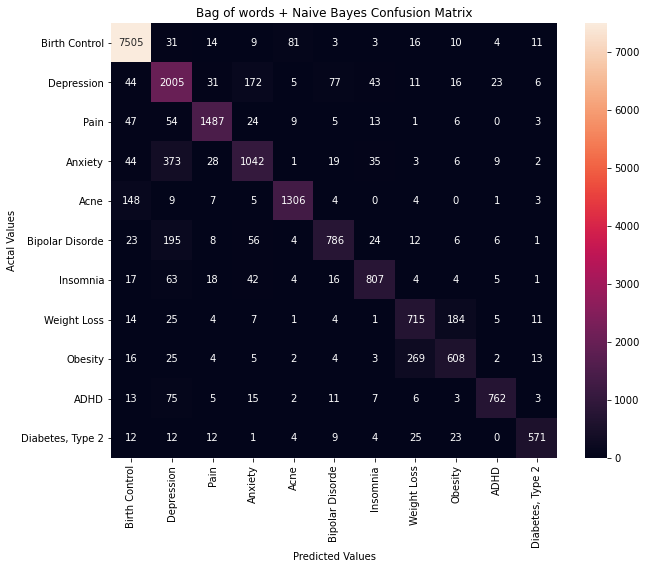

In [146]:
print_confusion(cm, "Bag of words + Naive Bayes")

### Passive Aggressive Classifier

In [147]:
from sklearn.linear_model import PassiveAggressiveClassifier,LogisticRegression
model = PassiveAggressiveClassifier()
model.fit(bag_train, ytrain)
pred = model.predict(bag_test)
score = metrics.accuracy_score(ytest, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.888


In [148]:
cm = metrics.confusion_matrix(ytest, pred, labels=pred_conditions)

#### Important words for this model 

In [149]:
print("--------------------Bag of words + Passive Agressive------------------------------")
for cls in pred_conditions:
    imp_words(bag_vectorizer, model, cls)
    print("###########################################################")
    

--------------------Bag of words + Passive Agressive------------------------------
Birth Control nexplanon 3.7287898015666787
Birth Control ne 3.9785497898779782
Birth Control aviane 4.115268424779476
Birth Control zarah 4.873574571394424
Birth Control insertion 5.1751874087264245
###########################################################
Depression fetzima 4.255455590128815
Depression trintellix 4.578304957858903
Depression odema 4.616262293552125
Depression brintellix 5.124608933284421
Depression emsam 5.287042605775332
###########################################################
Pain oxycodone 3.834679406826799
Pain percocet 3.9025313481843265
Pain wonderfull 4.079413112602249
Pain celebrex 4.6376285366926675
Pain nucynta 4.663992168494586
###########################################################
Anxiety seamless 4.005568547503363
Anxiety comedown 4.114010957829832
Anxiety serax 4.7297871908894225
Anxiety vistaril 4.74246007525712
Anxiety palps 5.027169886233894
##################

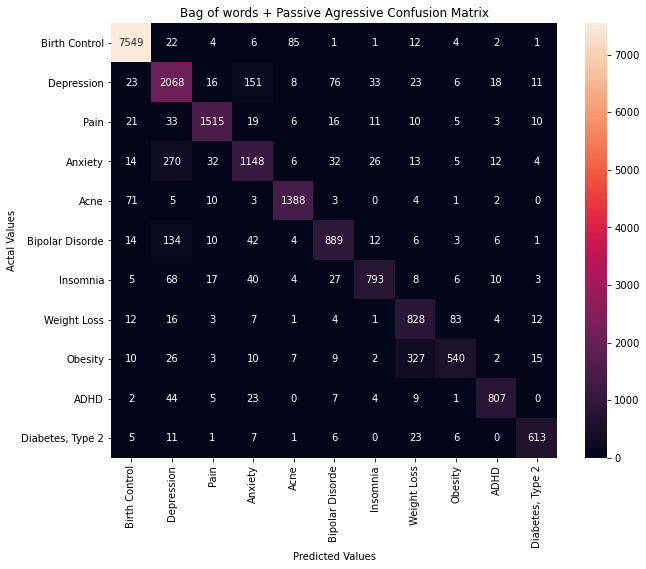

In [150]:
print_confusion(cm, "Bag of words + Passive Agressive")

## TFIDF vectorizer

In [151]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8)
tfidf_train = vectorizer.fit_transform(Xtrain)
tfidf_test = vectorizer.transform(Xtest)

### Naive Bayes

In [152]:
model = MultinomialNB()
model.fit(tfidf_train, ytrain)
pred = model.predict(tfidf_test)
score = metrics.accuracy_score(ytest, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.756


In [153]:
cm = metrics.confusion_matrix(ytest, pred, labels=pred_conditions)

#### Important words for this model 

In [154]:
print("--------------------TFIDF + Naive Bayes------------------------------")
for cls in pred_conditions:
    imp_words(vectorizer, model, cls)
    print("###########################################################")
    

--------------------TFIDF + Naive Bayes------------------------------
Birth Control control -4.888208344801313
Birth Control birth -4.859578130789058
Birth Control pill -4.651784570923806
Birth Control month -4.597488046369663
Birth Control period -4.33686067385717
###########################################################
Depression anxiety -5.309301151134382
Depression effect -5.305022266723098
Depression feel -5.232349897928273
Depression mg -4.90653884293425
Depression depression -4.783408517416682
###########################################################
Pain relief -5.541562321094332
Pain medicine -5.530620837422323
Pain mg -5.433905743428693
Pain work -5.4271521143091555
Pain pain -3.884075929421771
###########################################################
Anxiety day -5.418682830842144
Anxiety panic -5.228922228491382
Anxiety attack -5.218561714555039
Anxiety mg -5.013371228464497
Anxiety anxiety -4.3311128210027965
#########################################################

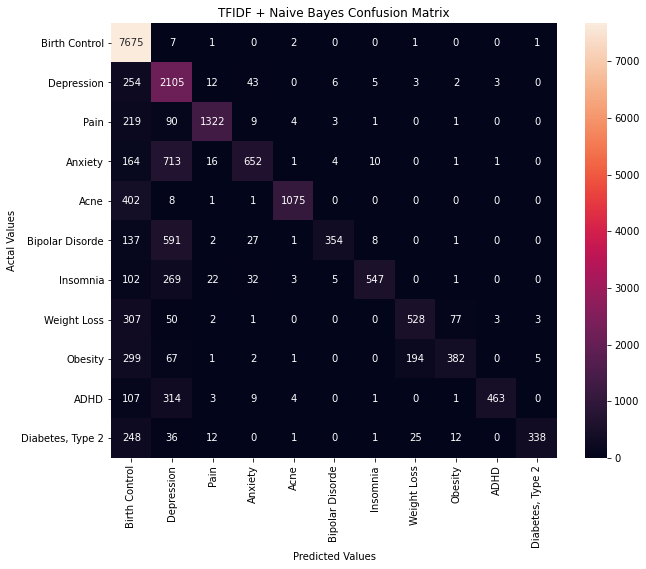

In [155]:
print_confusion(cm, "TFIDF + Naive Bayes")

### Passive Aggressive Classifier

In [156]:
model = PassiveAggressiveClassifier()
model.fit(tfidf_train, ytrain)
pred = model.predict(tfidf_test)
score = metrics.accuracy_score(ytest, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.913


In [157]:
cm = metrics.confusion_matrix(ytest, pred, labels=pred_conditions)

#### Important words for this model 

In [158]:
print("--------------------TFIDF + Passive Agressive------------------------------")
for cls in pred_conditions:
    imp_words(vectorizer, model, cls)
    print("###########################################################")
    

--------------------TFIDF + Passive Agressive------------------------------
Birth Control implanon 9.909247584809913
Birth Control aviane 10.976534818693223
Birth Control zarah 11.500793094538958
Birth Control nexplanon 12.343571886345874
Birth Control insertion 13.348878023216322
###########################################################
Depression lealeft 10.85414031493683
Depression fetzima 12.040982844846253
Depression emsam 12.599071453904513
Depression odema 12.751549043429078
Depression brintellix 13.835304593744842
###########################################################
Pain norco 6.944603337476713
Pain percocet 7.225845100867759
Pain pain 8.291455323556841
Pain celebrex 8.740968239584374
Pain nucynta 8.874601388891191
###########################################################
Anxiety buspar 9.373293178025317
Anxiety anxiety 9.893767138927826
Anxiety seamless 10.296147808440141
Anxiety palps 10.837903903626632
Anxiety vistaril 11.588863078127353
##########################

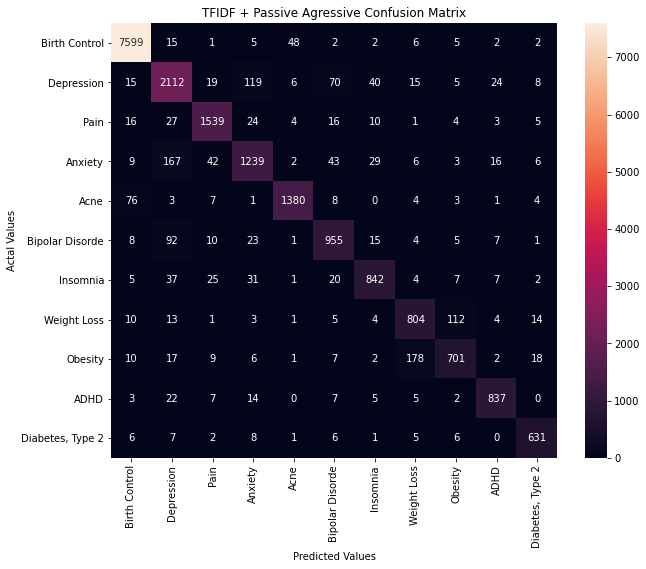

In [159]:
print_confusion(cm, "TFIDF + Passive Agressive")

## TFIDF: Bigrams + Passive Aggressive Classifier

In [160]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,2))
tfidf_train = vectorizer.fit_transform(Xtrain)
tfidf_test = vectorizer.transform(Xtest)

In [161]:
model = PassiveAggressiveClassifier()
model.fit(tfidf_train, ytrain)
pred = model.predict(tfidf_test)
score = metrics.accuracy_score(ytest, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.946


In [162]:
cm = metrics.confusion_matrix(ytest, pred, labels=pred_conditions)

#### Important words for this model 

In [163]:
print("--------------------TFIDF:Bigrams + Passive Agressive------------------------------")
for cls in pred_conditions:
    imp_words(vectorizer, model, cls)
    print("###########################################################")
    

--------------------TFIDF:Bigrams + Passive Agressive------------------------------
Birth Control nuvaring 6.060382760363497
Birth Control insertion 6.311839103027648
Birth Control nexplanon 6.52229436441083
Birth Control pregnant 6.983194765748253
Birth Control period 7.559282568804118
###########################################################
Depression deplin 4.914638640142022
Depression trintellix 5.83480986977755
Depression viibryd 6.311852402463431
Depression brintellix 7.558499804844924
Depression depression 9.360269301110613
###########################################################
Pain norco 4.860952402417798
Pain oxycontin 5.389359098439599
Pain nucynta 5.700465071719844
Pain percocet 5.761578132179091
Pain pain 10.102960186899637
###########################################################
Anxiety xanax 4.406501977084548
Anxiety valium 4.608853621895814
Anxiety vistaril 4.859871173347431
Anxiety buspar 7.8385639977008585
Anxiety anxiety 10.565185711444908
#################

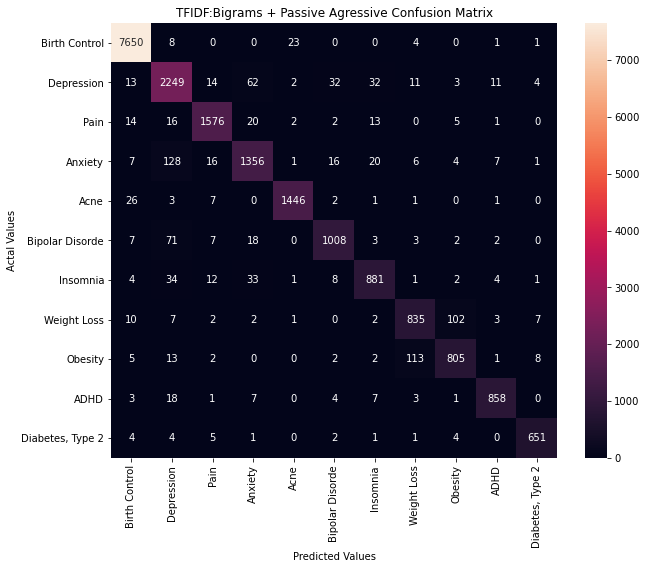

In [164]:
print_confusion(cm, "TFIDF:Bigrams + Passive Agressive")

## TFIDF : Trigrams + Passive Aggressive Classifier

In [165]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,3))
tfidf_train = vectorizer.fit_transform(Xtrain)
tfidf_test = vectorizer.transform(Xtest)

model = PassiveAggressiveClassifier()
model.fit(tfidf_train, ytrain)
pred = model.predict(tfidf_test)
score = metrics.accuracy_score(ytest, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.948


In [166]:
cm = metrics.confusion_matrix(ytest, pred, labels=pred_conditions)

#### Important words for this model 

In [167]:
print("--------------------TFIDF:Trigrams + Passive Agressive------------------------------")
for cls in pred_conditions:
    imp_words(vectorizer, model, cls)
    print("###########################################################")
    

--------------------TFIDF:Trigrams + Passive Agressive------------------------------
Birth Control spotting 7.131066954571875
Birth Control insertion 7.322521590622503
Birth Control bleeding 7.612902582520515
Birth Control pregnant 8.15023842702458
Birth Control period 10.826254365761631
###########################################################
Depression prozac 5.982158561396204
Depression celexa 5.985782878917582
Depression brintellix 7.152128713768017
Depression viibryd 7.448281052886898
Depression depression 11.424793896749149
###########################################################
Pain relief 5.231124664398753
Pain nucynta 5.645798224286808
Pain oxycontin 5.670203090298897
Pain percocet 5.969706483612696
Pain pain 12.675380283574999
###########################################################
Anxiety ativan 5.1165280420595805
Anxiety valium 5.118604287579058
Anxiety xanax 5.553430758878647
Anxiety buspar 8.561171942746103
Anxiety anxiety 12.193900803422522
###################

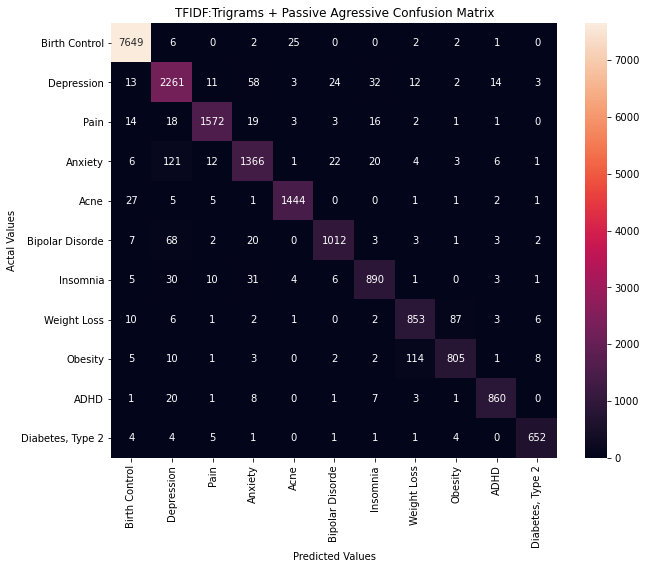

In [168]:
print_confusion(cm, "TFIDF:Trigrams + Passive Agressive")

accuracy:   0.950
--------------------TFIDF:Four Grams + Passive Agressive------------------------------
Birth Control insertion 7.840092734156256
Birth Control spotting 8.162915944663856
Birth Control bleeding 8.427098375210194
Birth Control pregnant 8.914506379004006
Birth Control period 13.419400077888806
###########################################################
Depression pristiq 6.872675809671233
Depression prozac 7.046186165928749
Depression brintellix 7.208261180259023
Depression viibryd 7.7745263390356145
Depression depression 12.972061633636232
###########################################################
Pain oxycontin 5.662456078113905
Pain surgery 5.879521163798717
Pain relief 5.941832428433026
Pain percocet 6.522323652255963
Pain pain 14.678002172794322
###########################################################
Anxiety valium 5.578562685836201
Anxiety ativan 5.599734024806838
Anxiety xanax 6.431790863188609
Anxiety buspar 8.702740447175884
Anxiety anxiety 14.2411357473847

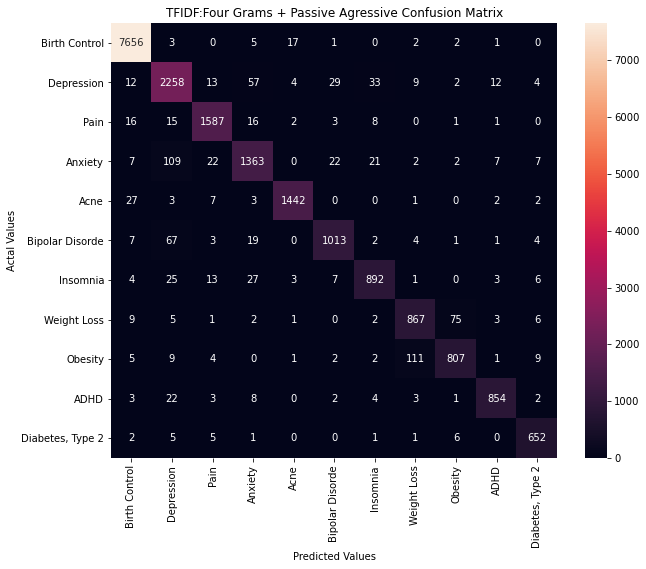

In [169]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,4))
tfidf_train = vectorizer.fit_transform(Xtrain)
tfidf_test = vectorizer.transform(Xtest)

model = PassiveAggressiveClassifier()
model.fit(tfidf_train, ytrain)
pred = model.predict(tfidf_test)
score = metrics.accuracy_score(ytest, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(ytest, pred, labels=pred_conditions)

print("--------------------TFIDF:Four Grams + Passive Agressive------------------------------")
for cls in pred_conditions:
    imp_words(vectorizer, model, cls)
    print("###########################################################")
    

print_confusion(cm, "TFIDF:Four Grams + Passive Agressive")

In [171]:
vectorizer_final = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,5))
tfidf_train = vectorizer_final.fit_transform(Xtrain)
tfidf_test = vectorizer_final.transform(Xtest)

model_final = PassiveAggressiveClassifier()
model_final.fit(tfidf_train, ytrain)
pred = model_final.predict(tfidf_test)
score = metrics.accuracy_score(ytest, pred)
print("accuracy:   %0.3f" % score)

print("--------------------TFIDF:Five Grams + Passive Agressive------------------------------")
for cls in pred_conditions:
    imp_words(vectorizer_final, model_final, cls)
    print("###########################################################")

cm = metrics.confusion_matrix(ytest, pred, labels=pred_conditions)
print_confusion(cm, "TFIDF:Five Grams + Passive Agressive")

accuracy:   0.950
--------------------TFIDF:Five Grams + Passive Agressive------------------------------
Birth Control cramp 8.563172247923834
Birth Control spotting 8.829089892256798
Birth Control pregnant 9.412398126385378
Birth Control bleeding 9.435110540204288
Birth Control period 15.272354496233334
###########################################################
Depression antidepressant 7.407361024528154
Depression prozac 7.569671397582969
Depression pristiq 7.683004190209329
Depression viibryd 8.056762737057138
Depression depression 14.167080478030638
###########################################################
Pain nucynta 5.793759888165533
Pain relief 6.28529869154813
Pain surgery 6.3602288549726005
Pain percocet 6.859265253935805
Pain pain 16.490439419582454
###########################################################
Anxiety valium 5.6833690802247645
Anxiety ativan 5.896854356546051
Anxiety xanax 7.285751899673501
Anxiety buspar 8.787780102867183
Anxiety anxiety 15.170184490154211

accuracy:   0.950
--------------------TFIDF:Six Grams + Passive Agressive------------------------------
Birth Control cramp 9.237762950670406
Birth Control spotting 9.432227162431658
Birth Control bleeding 9.835610820181945
Birth Control pregnant 9.863763175879328
Birth Control period 16.824775579393744
###########################################################
Depression prozac 7.978403516585217
Depression viibryd 8.104879565789133
Depression wellbutrin 8.122354229417795
Depression pristiq 8.352025218307972
Depression depression 15.241953443300435
###########################################################
Pain oxycontin 5.767707198751932
Pain relief 6.485674893075244
Pain percocet 6.494750563572334
Pain surgery 6.820370691426736
Pain pain 17.89279410092858
###########################################################
Anxiety valium 5.8519973321001455
Anxiety ativan 6.415001977207164
Anxiety xanax 7.782439520547988
Anxiety buspar 9.087912147697041
Anxiety anxiety 16.011482914300153
###

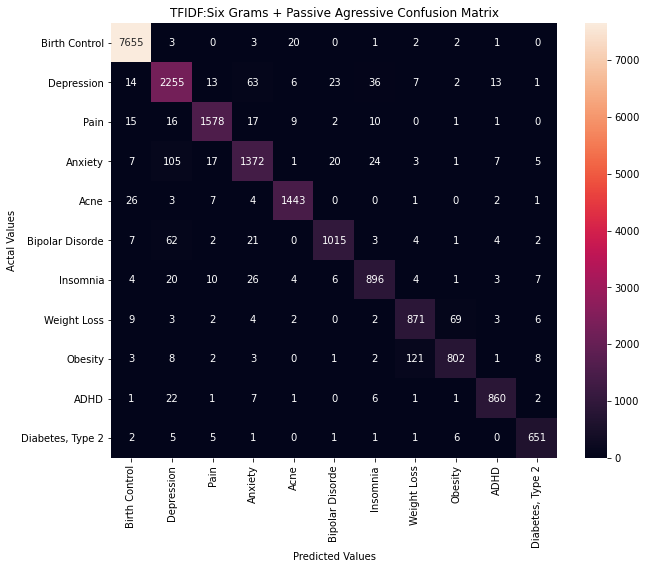

In [172]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.8, ngram_range=(1,6))
tfidf_train = vectorizer.fit_transform(Xtrain)
tfidf_test = vectorizer.transform(Xtest)

model = PassiveAggressiveClassifier()
model.fit(tfidf_train, ytrain)
pred = model.predict(tfidf_test)
score = metrics.accuracy_score(ytest, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(ytest, pred, labels=pred_conditions)

print("--------------------TFIDF:Six Grams + Passive Agressive------------------------------")
for cls in pred_conditions:
    imp_words(vectorizer, model, cls)
    print("###########################################################")


print_confusion(cm, "TFIDF:Six Grams + Passive Agressive")

***As we can see most accurate model is TFIDF + Passive Aggressive Classifier with 5 grams***

## Prediction

In [179]:
text =["I have Severe Anxiety Panic Disorder started when I was a child. I have been taking Xanax For over 30 years now. Everyday 4 pills really bad days I was taking 6 pills. My doctor has retired and now I have a new doctor that is cutting me off. From Taking 4 pills everyday they only gave me enough for 1/2 of a pill everyday. I'm never able to sleep I have extreme insomnia, anxiety and extreme panic attacks that plague me everyday. I was shocked at how much they cut me off and so quickly. Right now I am in critical condition. They say I had my monthly limit. I was able to function when I was given Xanax. I was able to sleep normal and eat and live a normal life. I have taken Xanax for over 30 years-long. It is truly inhumane. My body Relies on taking a medicine everyday and cutting me OFF. My body's not being able to handle the shock of the withdrawal symptoms will be really hard on my body. Some People REALLY DO NEED Xanax"]
test = vectorizer_final.transform(text)
pred=model_final.predict(test)[0]
print("Predicted", pred, "Actual:", "Anxiety")

Predicted Anxiety Actual: Anxiety


In [177]:
text = ['Taking this drug, for me, was taking the tiger by the tail. And I got eaten in the end. Lol, to be less dramatic, I used 300 to 600 mg gabapentin for sleep every night for fourteen months. It worked like a dream and I thought my lifelong debilitating sleep issues were over. No. It stopped working. I sleep even worse ON the drug now than I used to sleep without it. And when I don’t take it, I have complete insomnia—not even a doze all night. I know I could increase my dose and maybe be okay for another six months or another year. But I have to get off of it sometime if it’s just going to stop working periodically. I can’t increase the dose forever. I wonder how long it will take to withdrawal? I wonder if I’ll ever sleep well again? Maybe I’ll update this post or post again when I find out']
test = vectorizer_final.transform(text)
pred=model_final.predict(test)[0]
pred

'Insomnia'